In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.stats

NPL = 3

In [2]:
tts_lc_med_0 = np.load('/Users/research/Desktop/K00137_tts_med_0.npy')
tts_lc_med_1 = np.load('/Users/research/Desktop/K00137_tts_med_1.npy')
tts_lc_med_2 = np.load('/Users/research/Desktop/K00137_tts_med_2.npy')

tts_lc_std_0 = np.load('/Users/research/Desktop/K00137_tts_std_0.npy')
tts_lc_std_1 = np.load('/Users/research/Desktop/K00137_tts_std_1.npy')
tts_lc_std_2 = np.load('/Users/research/Desktop/K00137_tts_std_2.npy')

lc_tts = [tts_lc_med_0, tts_lc_med_1, tts_lc_med_2]
lc_err = [tts_lc_std_0, tts_lc_std_1, tts_lc_std_2]

In [3]:
tts_hbm_med_0 = np.load('/Users/research/Desktop/K00137_hbm_tts_0.npy')
tts_hbm_med_1 = np.load('/Users/research/Desktop/K00137_hbm_tts_1.npy')
tts_hbm_med_2 = np.load('/Users/research/Desktop/K00137_hbm_tts_2.npy')

tts_hbm_std_0 = np.load('/Users/research/Desktop/K00137_hbm_err_0.npy')
tts_hbm_std_1 = np.load('/Users/research/Desktop/K00137_hbm_err_1.npy')
tts_hbm_std_2 = np.load('/Users/research/Desktop/K00137_hbm_err_2.npy')

hbm_tts = [tts_hbm_med_0, tts_hbm_med_1, tts_hbm_med_2]
hbm_err = [tts_hbm_std_0, tts_hbm_std_1, tts_hbm_std_2]

In [4]:
# rough starting estimate for periods and epochs
periods = []
epochs = []

for npl in range(NPL):
    periods.append(np.median(hbm_tts[npl][1:] - hbm_tts[npl][:-1]))
    epochs.append(hbm_tts[npl].min())

In [5]:
lc_ind = []
hbm_ind = []

for npl in range(NPL):
    dummy = lc_tts[npl] - periods[npl]
    dummy -= dummy.min()
    dummy /= periods[npl]
    dummy -= dummy[len(dummy)//2-1]
    
    lc_ind.append(np.rint(dummy))

    
    dummy = hbm_tts[npl] - periods[npl]
    dummy -= dummy.min()
    dummy /= periods[npl]
    dummy -= dummy[len(dummy)//2-1]
    
    hbm_ind.append(np.rint(dummy))

In [6]:
for npl in range(NPL):
    keep = (hbm_tts[npl] > 280)*(hbm_tts[npl] < 1520)
    hbm_ind[npl] = hbm_ind[npl][keep]
    hbm_tts[npl] = hbm_tts[npl][keep]
    hbm_err[npl] = hbm_err[npl][keep]
    
    keep = (lc_tts[npl] > 280)*(lc_tts[npl] < 1520)
    lc_ind[npl] = lc_ind[npl][keep]
    lc_tts[npl] = lc_tts[npl][keep]
    lc_err[npl] = lc_err[npl][keep]

In [7]:
lc_ephemeris = []
hbm_ephemeris = []

for npl in range(NPL):
    lc_ephemeris.append(np.polyval(np.polyfit(lc_ind[npl], lc_tts[npl], 1), lc_ind[npl]))
    hbm_ephemeris.append(np.polyval(np.polyfit(hbm_ind[npl], hbm_tts[npl], 1), hbm_ind[npl]))

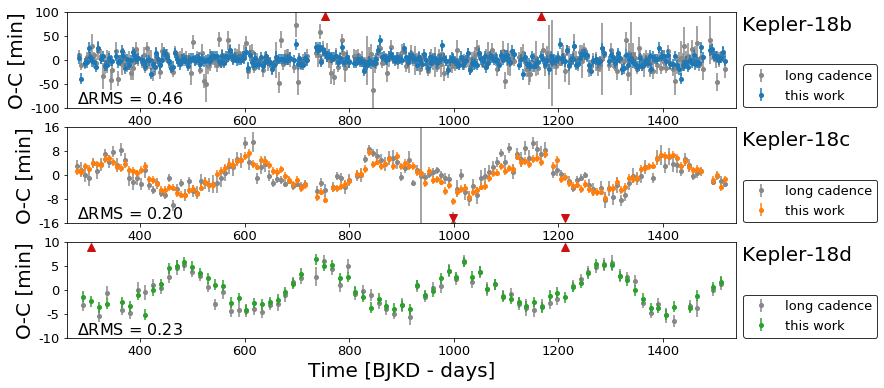

In [8]:
fig, axes = plt.subplots(NPL, figsize=(12,6))

for npl in range(NPL):
    lim = [100,16,10]
    
    lc_xtime = lc_ephemeris[npl]
    lc_yomc  = (lc_tts[npl] - lc_ephemeris[npl])*24*60
    lc_yerr  = lc_err[npl]*24*60
    
    lc_up = lc_yomc > lim[npl]
    lc_dn = lc_yomc < -lim[npl]
    
    hbm_xtime = hbm_ephemeris[npl]
    hbm_yomc  = (hbm_tts[npl] - hbm_ephemeris[npl])*24*60
    hbm_yerr  = hbm_err[npl]*24*60
    
    delta_rms = (np.std(lc_yomc)-np.std(hbm_yomc))/(np.std(lc_yomc))
    
    axes[npl].errorbar(lc_xtime, lc_yomc, yerr=lc_yerr, fmt='.', color='#888888'.format(npl), \
                       zorder=0, ms=8, label='long cadence')
    axes[npl].errorbar(hbm_xtime, hbm_yomc, yerr=hbm_yerr, fmt='.', color='C{0}'.format(npl), \
                       ms=8, label='this work')
    axes[npl].plot(lc_xtime[lc_up], np.ones_like(lc_xtime)[lc_up]*0.9*lim[npl], \
                   '^', ms=8, color='#CF0E0E')
    axes[npl].plot(lc_xtime[lc_dn], -np.ones_like(lc_xtime)[lc_dn]*0.9*lim[npl], \
                   'v', ms=8, color='#CF0E0E')
    axes[npl].set_ylabel('O-C [min]', fontsize=20)
    axes[npl].set_xlim(260,1540)
    axes[npl].set_xticks(np.arange(400,1600,200))
    axes[npl].set_xticklabels(np.arange(400,1600,200), fontsize=13)
    axes[npl].legend(bbox_to_anchor=(1.22,0.517), fontsize=13, framealpha=None, edgecolor='k')  
    axes[npl].text(280, -0.92*lim[npl], r'$\Delta$RMS = {0:.2f}'.format(delta_rms), \
                   fontsize=16)
    
axes[0].set_ylim(-lim[0],lim[0])
axes[1].set_ylim(-lim[1],lim[1])
axes[2].set_ylim(-lim[2],lim[2])

axes[0].text(1550, 0.92*lim[0], 'Kepler-18b\n', ha='left', va='top', fontsize=20)
axes[1].text(1550, 0.92*lim[1], 'Kepler-18c\n', ha='left', va='top', fontsize=20)
axes[2].text(1550, 0.92*lim[2], 'Kepler-18d\n', ha='left', va='top', fontsize=20)


axes[0].set_yticks(np.arange(-100,120,50))
axes[0].set_yticklabels(np.arange(-100,120,50), fontsize=13)
axes[1].set_yticks(np.arange(-16,20,8))
axes[1].set_yticklabels(np.arange(-16,20,8), fontsize=13)
axes[2].set_yticks(np.arange(-10,15,5))
axes[2].set_yticklabels(np.arange(-10,15,5), fontsize=13)
axes[NPL-1].set_xlabel('Time [BJKD - days]', fontsize=20)
plt.savefig('/Users/research/Desktop/K00137_comparison_for_finesst.pdf', bbox_inches='tight')
plt.show()

In [9]:
1/np.array(periods)

array([0.28530903, 0.13086078, 0.06729946])

In [10]:
import scipy.signal as sig
import astropy.stats

def find_ttv_frequencies(tts, ephemeris, period):
    # observed minus calculated
    omc = tts-ephemeris
    
    # Hann window to reduce ringing
    hann = sig.windows.hann(len(omc))
    hann /= np.sum(hann)
    
    
    # identify any egregious outliers
    local_trend = sig.medfilt(omc, kernel_size=7)
    
    out = np.zeros_like(tts)
    out = np.abs(omc - local_trend)/astropy.stats.mad_std(omc) > 5.0
    
            
    # compute a Lomb-Scargle periodogram
    lombscargle = astropy.stats.LombScargle(tts[~out], omc[~out]*hann[~out])
    freq, power = lombscargle.autopower(minimum_frequency=1/(tts.max()-tts.min()), \
                                        maximum_frequency=0.5/period, \
                                        samples_per_peak=11)
    
    peak_freq  = freq[np.argmax(power)]
    peak_fap   = lombscargle.false_alarm_probability(power.max(), method='bootstrap')
    
    return freq, power, peak_freq

169.62685549787778


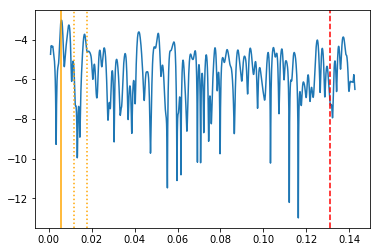

267.0047803278181


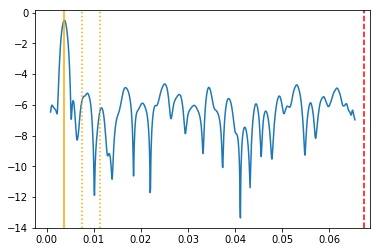

268.0555892266301


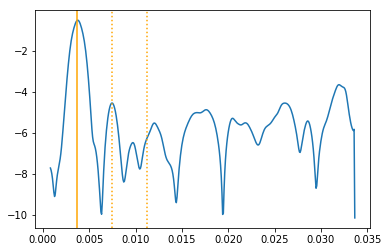

In [12]:
for npl in range(3):

    freq, power, peak_freq = find_ttv_frequencies(hbm_tts[npl], hbm_ephemeris[npl], periods[npl])
    
    print(1/peak_freq)

    plt.figure()
    plt.plot(freq, np.log(power))
    plt.axvline(peak_freq, c='orange')
    plt.axvline(2*peak_freq, c='orange', ls=':')
    plt.axvline(3*peak_freq, c='orange', ls=':')
    if npl < 2:
        plt.axvline(1/periods[npl+1], c='red', ls='--')
    plt.show()